# CUSTOMER CHURN PREDICTION MODEL USING ARTIFICIAL NEURAL NETWORK

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [72]:
df = pd.read_csv("Customer-Churn.csv")

In [73]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

step 1:
      drop customer id column as is not always useful

In [25]:
df.drop('customerID', axis='columns', inplace=True)

In [26]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Step 2:
    # # Total charges column dtype is object compared to monthly charge that is Float. this colum has string dtypes as well. 

In [27]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [28]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [74]:
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [75]:
pd.to_numeric(df['TotalCharges'],errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [31]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [76]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [77]:
df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [78]:
len(df[df['TotalCharges'] == ' '])

11

In [79]:
df = df[df['TotalCharges'] != ' ']

In [80]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [81]:
len(df[df['TotalCharges'] == ' '])

0

In [82]:
df.shape

(7032, 21)

In [83]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [85]:
df.TotalCharges.dtypes

dtype('float64')

# Visualization for Customers Who are leaving/Those not Leaving

In [86]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure


Text(0.5, 1.0, 'Customer Churn Prediction')

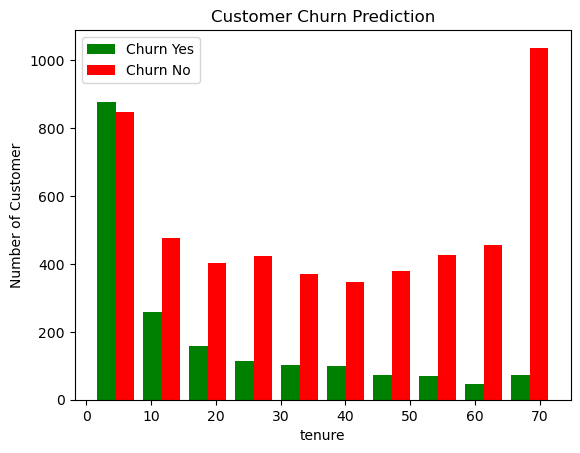

In [87]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn Yes','Churn No'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction')

In [88]:
def print_unique_col_values(df): 
    for colum in df:
        if df[colum].dtypes == 'object':
            print(colum, df[colum].unique())

In [89]:
print_unique_col_values(df)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [90]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [91]:
df.replace('No phone service', 'No', inplace=True)
print_unique_col_values(df)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [95]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines',
'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [96]:
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0}, inplace=True)

In [98]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [99]:
df['gender'].replace({'Female':1,'Male':0}, inplace=True)

In [101]:
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,1,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1


In [102]:
df1 = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [103]:
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,True,False,False,True,False,False,False,False,False,True


In [104]:
bool_to_number = ['InternetService_DSL','InternetService_Fiber optic','InternetService_No','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']

In [111]:
for ite in bool_to_number:
    df1[ite].replace({True:1,False:0}, inplace=True)

In [112]:
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1


In [113]:
df1.drop('customerID', axis=1, inplace=True)

In [114]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [116]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [118]:
df1[cols_to_scale].head(2)

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867


In [119]:
x = df1.drop('Churn', axis=1)
y = df1['Churn']

In [120]:
x.shape

(7032, 26)

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [122]:
x_train.shape 

(5625, 26)

In [123]:
x_test.shape

(1407, 26)

In [124]:
x_train[:2]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [125]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train, epochs=100)




Epoch 1/100


176/176 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7385
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.7924
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8009
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8028
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8082
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8073
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8185
Epoch 71/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8196
Epoch 72/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8169
Epoch 73/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8172
Epoch 74/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8174
Epoch 75/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8174
Epoch 76/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8188
Epoch 77/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8178
Epoch 78/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8190
Epoch 79/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 

In [126]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.7854


[0.4462340474128723, 0.7853589057922363]

In [127]:
yp = model.predict(x_test)

44/44 [==============================] - 0s 2ms/step


In [128]:
yp[:5]

array([[0.30198464],
       [0.42152303],
       [0.00773743],
       [0.6568169 ],
       [0.42266268]], dtype=float32)

In [130]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [131]:
yp_predicted = []

In [132]:
for element in yp:
    if element > 0.5:
        yp_predicted.append(1)
    else:
        yp_predicted.append(0)    

In [133]:
yp_predicted[:5]

[0, 0, 0, 1, 0]

# classification Report and Confusion Metrics

In [134]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,yp_predicted))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       999
           1       0.68      0.48      0.57       408

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.77      0.79      0.77      1407



Text(95.72222222222221, 0.5, 'truth')

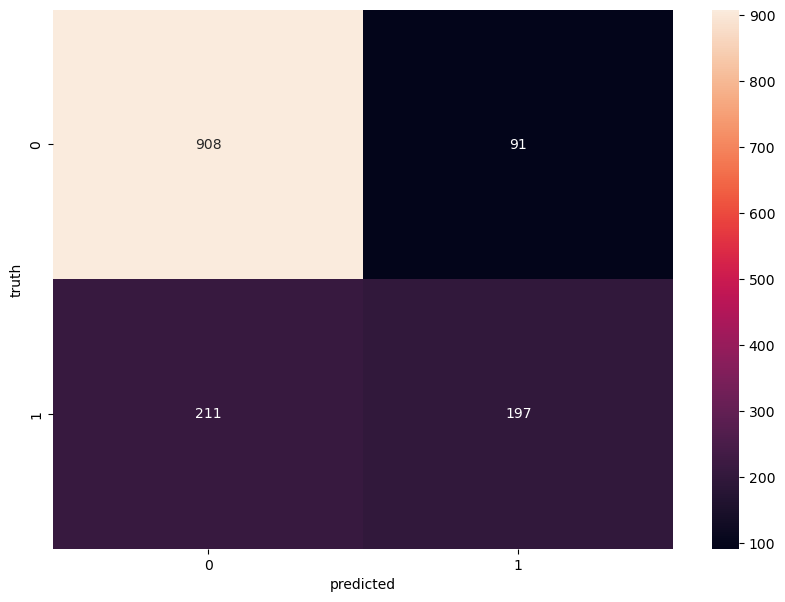

In [135]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=yp_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

# Handling Imbalance in Data Sets

In [136]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [137]:
def ANN(x_train, y_train,x_test, y_test,loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss=loss,
                  metrics=['accuracy'])
    
    if weights == -1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100)
        
    print(model.evaluate(x_test, y_test))
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print('Classification Report: \n', classification_report(y_test,y_preds))
    
    return y_preds

In [138]:
y_preds = ANN(x_train, y_train,x_test, y_test,'binary_crossentropy', 1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5107 - accuracy: 0.7417
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7909
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7998
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8032
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8092
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8094
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8100
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8101
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4055 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8304
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8324
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8316
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8313
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8352
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8343
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8325
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8297
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8345
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3530 - accuracy: 

In [139]:
y_test.value_counts()

Churn
0    999
1    408
Name: count, dtype: int64

NOTICE THE IMBALANCE OF THE 0th class and the 1s class.

# # 1st Technique of handling imbalance data set


In [145]:
# class count
count_class_0, count_class_1 = df1.Churn.value_counts()


In [147]:
# Divide by Class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [148]:
df1.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [149]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [153]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1], axis=0)

print('Random Under-Sampling: Technique')
print(df_test_under.Churn.value_counts())

Random Under-Sampling: Technique
Churn
0    1869
1    1869
Name: count, dtype: int64


In [154]:
x = df_test_under.drop('Churn', axis=1)
y = df_test_under['Churn']

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15, stratify=y)

In [157]:
y_train.value_counts()

Churn
1    1498
0    1492
Name: count, dtype: int64

In [158]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6149 - accuracy: 0.6612
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7472
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7538
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7609
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.7632
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7562
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7602
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7649
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7676
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8054
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8054
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8080
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8064
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8077
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8077
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8067
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8067
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8057
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8070
Epoch 93/100
